In [155]:
#import standard data analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [156]:
df_batting = pd.read_csv('batter_features.csv')

In [157]:
df_batting.drop(columns=['Unnamed: 0','primary_position'], inplace=True)

In [158]:
#!pip install lazypredict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [159]:
#account for shohei, change his position to unknown to avoid errors when training


In [160]:
X = df_batting.drop(columns='total_pa')
y = df_batting['total_pa']

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [162]:
# Scale features
numeric_cols = X_train.select_dtypes(include=np.number).columns

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [163]:
#convert categorical data
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [164]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split

# Initialize the ElasticNetCV model (with 10-fold cross-validation)
elastic_net = ElasticNetCV(cv=10, random_state=42, alphas=np.logspace(-4, 4, 100), 
                           l1_ratio=0.5, max_iter=10000, tol=1e-4)

# Fit the ElasticNetCV model to the training data
elastic_net.fit(X_train, y_train)

# Get the best alpha and L1 ratio from cross-validation
best_alpha = elastic_net.alpha_
best_l1_ratio = elastic_net.l1_ratio_
print(f"Best alpha: {best_alpha}")
print(f"Best L1 ratio: {best_l1_ratio}")

# Predict the target on the test set
y_pred = elastic_net.predict(X_test)

# Ensure that the predicted values are non-negative (e.g., for a count variable like 'PA')
y_pred = np.maximum(y_pred, 0)

# Calculate the RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate the R² score (coefficient of determination)
r2 = r2_score(y_test, y_pred)


# Ensure that the predicted values are non-negative (e.g., for a count variable like 'PA')
y_pred = np.maximum(y_pred, 0)

# Calculate the RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate the R² score (coefficient of determination)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Best alpha: 0.03853528593710531
Best L1 ratio: 0.5
Root Mean Squared Error (RMSE): 143.4979
R² Score: 0.6085


                          Feature  Coefficient  Abs_Coefficient
3                       total_pa_   115.467185       115.467185
0                             age  -104.122253       104.122253
2            avg_lineup_position_   -51.519977        51.519977
1                  years_after_28    42.067845        42.067845
5                         ops_reg    38.128758        38.128758
12   line_drives_ratio_batter_reg   -19.743719        19.743719
4             avg_lineup_position    16.555557        16.555557
6               k_rate_batter_reg   -16.141318        16.141318
16                         bats_R   -10.813169        10.813169
14           hr_fb_pct_batter_reg    -8.623900         8.623900
11  ground_balls_ratio_batter_reg    -8.464718         8.464718
15                         bats_L     6.133373         6.133373
8           batter_avg_exp_ba_reg     5.214877         5.214877
10     fly_balls_ratio_batter_reg     3.036361         3.036361
13        popups_ratio_batter_reg     2.

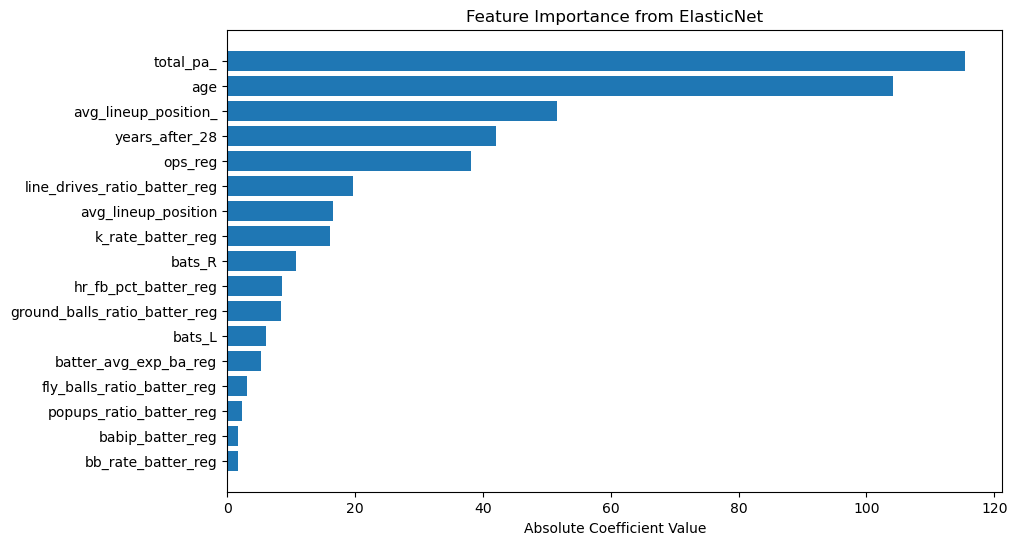

In [165]:
coefficients = elastic_net.coef_

# Create a DataFrame for the coefficients to associate with feature names
# After scaling, the feature names are lost, so we use the columns from X
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,  # Use the original feature names from X
    'Coefficient': coefficients
})

# Sort the features by the absolute value of the coefficients
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Print the feature importance
print(feature_importance)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Abs_Coefficient'])
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance from ElasticNet')
plt.gca().invert_yaxis()  # To show the most important feature at the top
plt.show()

In [166]:
print("\nActual vs Predicted Values:")
print(pd.DataFrame({"Actual": y_test, "Predicted": y_pred}).head(20))  # Show first 20 rows


Actual vs Predicted Values:
     Actual   Predicted
208   638.0  621.639408
259   440.0  161.546695
97    233.0  172.452119
148     0.0   15.838649
395   425.0  276.852067
485     0.0  406.503954
234     9.0  121.394160
181     0.0   59.848486
604   431.0  200.316711
367     0.0  185.876017
260   617.0  488.785344
368     0.0  140.636749
451     0.0   31.426977
396   329.0  102.933032
351   111.0  203.053001
77    421.0  340.345990
607     0.0    0.000000
420   455.0  248.954605
174   504.0  332.135544
741     6.0  137.342944


In [167]:
df_batting.loc[741]

total_pa                              6.0
age                                  23.0
years_after_28                        0.0
bats                                    L
avg_lineup_position_                7.875
total_pa_                          15.625
avg_lineup_position              5.906514
ops_reg                          0.408911
k_rate_batter_reg                0.272622
bb_rate_batter_reg               0.018906
batter_avg_exp_ba_reg            0.253619
babip_batter_reg                 0.249339
fly_balls_ratio_batter_reg       0.075251
ground_balls_ratio_batter_reg    0.168174
line_drives_ratio_batter_reg     0.191803
popups_ratio_batter_reg          0.254971
hr_fb_pct_batter_reg             0.039008
Name: 741, dtype: object